In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [16]:
df = pd.read_json('sarcasm.json', lines=True)
sentences = np.array(df["headline"])
sarcasm = np.array(df["is_sarcastic"])
url = np.array(df["article_link"])

print(len(sentences))

26709


In [17]:
training_size = 23000

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = sarcasm[:training_size]
testing_labels = sarcasm[training_size:]

In [38]:
vocab_size = 1000
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

max_length = 30
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
training_padded = pad_sequences(training_sequences, padding = "post", maxlen = max_length)
testing_padded = pad_sequences(testing_sequences, padding = "post", maxlen = max_length)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 10, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [41]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data = (testing_padded, testing_labels), verbose = 1)


Epoch 1/50
719/719 [==============================] - 1s 462us/step - loss: 0.5987 - accuracy: 0.6722 - val_loss: 0.4528 - val_accuracy: 0.7946
Epoch 2/50
719/719 [==============================] - 0s 396us/step - loss: 0.4080 - accuracy: 0.8167 - val_loss: 0.4009 - val_accuracy: 0.8118
Epoch 3/50
719/719 [==============================] - 0s 416us/step - loss: 0.3747 - accuracy: 0.8300 - val_loss: 0.3928 - val_accuracy: 0.8185
Epoch 4/50
719/719 [==============================] - 0s 377us/step - loss: 0.3644 - accuracy: 0.8333 - val_loss: 0.3924 - val_accuracy: 0.8148
Epoch 5/50
719/719 [==============================] - 0s 375us/step - loss: 0.3594 - accuracy: 0.8357 - val_loss: 0.4014 - val_accuracy: 0.8129
Epoch 6/50
719/719 [==============================] - 0s 375us/step - loss: 0.3569 - accuracy: 0.8367 - val_loss: 0.3971 - val_accuracy: 0.8145
Epoch 7/50
719/719 [==============================] - 0s 372us/step - loss: 0.3544 - accuracy: 0.8393 - val_loss: 0.4015 - val_accuracy:

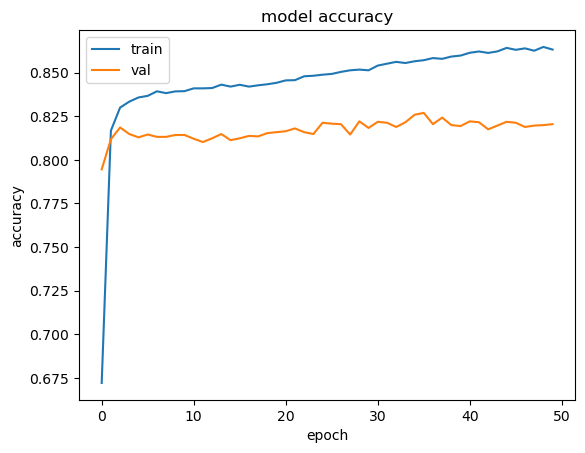

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
x=111
print(testing_sentences[x:x+1])
print(testing_labels[x:x+1])
print(model.predict(testing_padded[x:x+1]))

["one more (feminist) wonder about 'wonder woman': it passes the abuse litmus test"]
[0]
1/1 [==============================] - 0s 12ms/step
[[0.01496885]]
